<a href="https://colab.research.google.com/github/AtharvaTambat/WnCC-SoC-2022-QML/blob/main/Hyperparameters_in_Quantum_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Quantum Neural Network**
## **1. Creating a Quantum Neural Network for Classification**

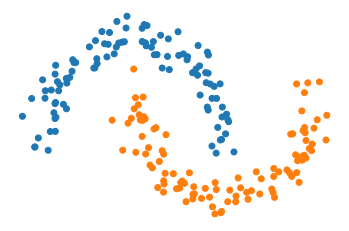

In [209]:
# Defines a two-layer network that could be used for binary classification
import tensorflow as tf

tf.keras.backend.set_floatx('float64')

layer_1 = tf.keras.layers.Dense(2)
layer_2 = tf.keras.layers.Dense(2, activation="softmax")

model = tf.keras.Sequential([layer_1, layer_2])
model.compile(loss="mae") # loss function is mean absolute error

# Creating a dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

n_samples = 200  # Defining the total number of samples 
X, y = make_moons(n_samples=n_samples, noise=0.1)
y_hot = tf.keras.utils.to_categorical(y, num_classes=2)  # one-hot encoded labels

c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in y]  # colours for each class
plt.axis("off")
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()

In [210]:
# Defining a node
import pennylane as qml

# Defining the number of qubits in the Quantum Layer
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits)) 
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

# Defining the weight_shapes dictionary to map argument 'weight' of the Quantum Node to its shape
n_layers = 6
weight_shapes = {"weights": (n_layers, n_qubits)}

# Creating a quantum layer to interface with other Kera layers
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

**The Representation of the Quantum Neural Network**


---





<img src = 'https://pennylane.ai/qml/_images/qnn_keras.png' width = '600'>

In [211]:
# Creating a hybrid neural network - consisting of 2 classical layers, our quantum layer, and other two classical layers
clayer_1 = tf.keras.layers.Dense(2) # classical layer 1 
clayer_2 = tf.keras.layers.Dense(2, activation="softmax") # classical layer 2 with softmax activation function for converting the output array into probabilities
model = tf.keras.models.Sequential([clayer_1, qlayer, clayer_2])

## **2. Adjusting hyperparameters**
The trend in accuracy is tested for the follwoing hyperparameters:

1. Number of epochs
2. Batch Size
3. Learning Rate

### **2.1 Number of Epochs**


In [ ]:
# Initialiing arrays to store the values of accuracy and loss
y_values_loss = []
y_values_acc = []
x_values = []

max_epoch = 30

# Training the model
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

model.compile(opt, loss="mae", metrics=["accuracy"])

# Fitting the data
fitting = model.fit(X, y_hot, epochs=max_epoch, batch_size=n_samples, validation_split=0.25, verbose=1)


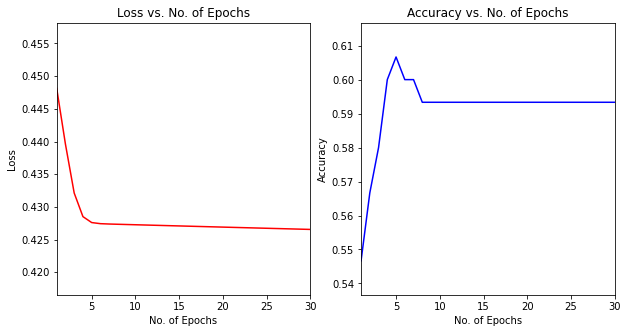

In [155]:
x_values = range(1,max_epoch + 1)
y_values_loss = fitting.history['loss']
y_values_acc = fitting.history['accuracy']
# Creating figure object
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(x_values, y_values_loss, color="red")
plt.title("Loss vs. No. of Epochs")
plt.xticks()
plt.yticks()
plt.xlim(min(x_values),max(x_values))
plt.ylim(min(y_values_loss) - 0.01,max(y_values_loss)+0.01)
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
 
plt.subplot(122)
plt.plot(x_values, y_values_acc, color="blue")
plt.title("Accuracy vs. No. of Epochs")
plt.xticks()
plt.yticks()
plt.xlim(min(x_values),max(x_values))
plt.ylim(min(y_values_acc) - 0.01,max(y_values_acc)+0.01)
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
 
plt.show()

### **Conclusion**
As can be observed from the graph, both the loss and the accuracy of the Quantum Neural Network levels-off after 5 epochs. Therefore, it is suffecient to train the QNN for 5 epochs without appreciable error in the output. 

### **2. Batch Size**

In [ ]:
# Initialising arrays to store the values of accuracy and loss
y_values_loss = []
y_values_mse = []
y_values_acc = []
x_values = []

x_values = range(1,n_samples+16,16)
# Training the model
for i in x_values:
    
    opt = tf.keras.optimizers.SGD(learning_rate=0.1)
    model.compile(opt, loss="mae", metrics=['MeanSquaredError', 'accuracy'])

    # Fitting the data
    fitting = model.fit(X, y_hot, epochs=2, batch_size=i, validation_split=0.25, verbose=1)
   

    y_values_loss.append(fitting.history['loss'][-1])
    y_values_mse.append(fitting.history['mean_squared_error'][-1])
    y_values_acc.append(fitting.history['accuracy'][-1])
    


y_values_loss = np.array(y_values_loss)
y_values_mse = np.array(y_values_mse)
y_values_acc = np.array(y_values_acc)

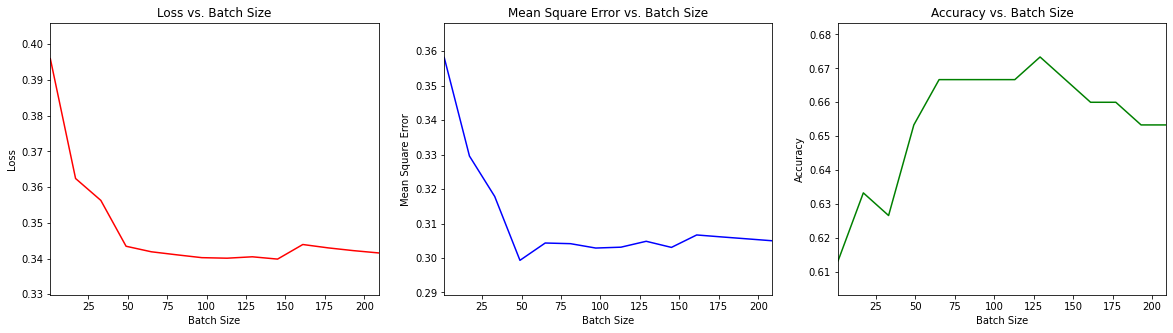

In [182]:
x_values = range(1,n_samples+16,16)
# Creating figure object
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.plot(x_values, y_values_loss, color="red")
plt.title("Loss vs. Batch Size")
plt.xticks()
plt.yticks()
plt.xlim(min(x_values),max(x_values))
plt.ylim(min(y_values_loss) - 0.01,max(y_values_loss)+0.01)
plt.xlabel("Batch Size")
plt.ylabel("Loss")
 
plt.subplot(132)
plt.plot(x_values, y_values_mse, color="blue")
plt.title("Mean Square Error vs. Batch Size")
plt.xticks()
plt.yticks()
plt.xlim(min(x_values),max(x_values))
plt.ylim(min(y_values_mse) - 0.01,max(y_values_mse)+0.01)
plt.xlabel("Batch Size")
plt.ylabel("Mean Square Error")
 
plt.subplot(133)
plt.plot(x_values, y_values_acc, color="green")
plt.title("Accuracy vs. Batch Size")
plt.xticks()
plt.yticks()
plt.xlim(min(x_values),max(x_values))
plt.ylim(min(y_values_acc)-0.01,max(y_values_acc)+0.01)
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
 
plt.show()

### **Conclusion**
As can be seen above, all three graph almost level off after a batch size of 50 to 75 data points. Therefore, at least 50 to 75 data points must be collected for this (moon) dataset to correctly classify the datapoints without appreciable error.

## **4. Learning Rate**

In [ ]:
# Initialising arrays to store the values of accuracy and loss
y_values_loss = []
y_values_acc = []
x_values = []

for i in np.arange(11):
  x_values.append(1/(10**((10-i)/2)))

for i in range(1,6):
  x_values.append(5*i)

# Training the model
for i in x_values:
    learning_rate = i
    
    opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(opt, loss="mae", metrics=["accuracy"])

    # Fitting the data
    fitting = model.fit(X, y_hot, epochs=2, batch_size=n_samples, validation_split=0.25, verbose=1)
   

    y_values_loss.append(fitting.history['loss'][-1])
    y_values_acc.append(fitting.history['val_accuracy'][-1])


y_values_loss = np.array(y_values_loss)
y_values_acc = np.array(y_values_acc)

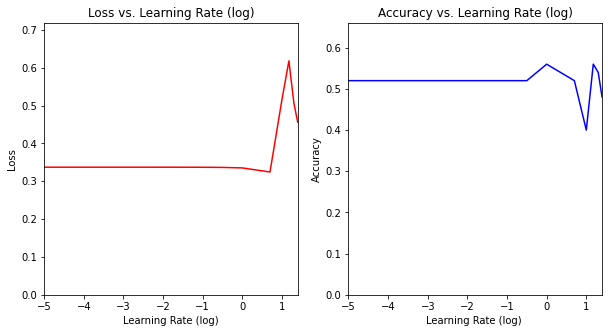

In [208]:
# Plotting the change in loss function and accuracy on the validation set with change in Learning Rate
import matplotlib.pyplot as plt
import numpy as np

# Creating figure object
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(np.log10(x_values), y_values_loss, color="red")
plt.title("Loss vs. Learning Rate (log)")
plt.xticks()
plt.yticks()
plt.xlim(min(np.log10(x_values)),max(np.log10(x_values)))
plt.ylim(0,max(y_values_loss)+0.1)
plt.xlabel("Learning Rate (log)")
plt.ylabel("Loss")
 
plt.subplot(122)
plt.plot(np.log10(x_values), y_values_acc, color="blue")
plt.title("Accuracy vs. Learning Rate (log)")
plt.xticks()
plt.yticks()
plt.xlim(min(np.log10(x_values)),max(np.log10(x_values)))
plt.ylim(0,max(y_values_acc)+0.1)
plt.xlabel("Learning Rate (log) ")
plt.ylabel("Accuracy")
 
plt.show()

### **Conclusion**
As can be seen in the above graph, both the loss and accuracy are constant for learning rate $< 1$, above which, both the graph do not show any definite pattern. This may indicate either one of the following:

1. **Overshooting problem:** As the optimizer reaches the minima of the loss function,sometimes, the learning rate of the model needs to be decayed in each step for the optimizer to converge to the minimum properly. for a very large value of learning rate, the optimizer may keep overshooting the the minima.
2. **Our data is insuffecient** (we need to train the QNN for larger range of learning rates and analyse)